Your name: Mitchell Scott (mtscot4)

Please complete the following two problems and submit your colab notebook on canvas. Make sure you save all the outputs and your code is excutable on my computer. This homework covers the first two lectures.

#**Problem 1** Read the following detailed explanation of FEM and Fenics tutorial and propose a method to improve the accuracy of the output of the following code (You only need to modify one or a few parameters in the provided code and rerun the code). (40pts)

# Mathematical problem formulation

Many books on programming languages start with a “Hello, World!” program. Readers are curious to know how fundamental tasks are expressed in the language, and printing a text to the screen can be such a task. In the world of finite element methods for PDEs, the most fundamental task must be to solve the Poisson equation. Our counterpart to the classical “Hello, World!” program therefore solves the following boundary-value problem:

$$
-\nabla^2 u(x) = f(x), \quad x \text{ in } \Omega, \quad (1)
$$

$$
u(x) = u_D(x), \quad x \text{ on } \partial\Omega. \quad (2)
$$

Here, \( u = u(x) \) is the unknown function, \( f = f(x) \) is a prescribed function, $\nabla^2$ is the Laplace operator (often written as $\Delta$, $\Omega$ is the spatial domain, and $\partial\Omega$ is the boundary of $\Omega$. The Poisson problem, including both the PDE $-\nabla^2 u = f$ and the boundary condition \( u = u_D \) on $\partial\Omega$, is an example of a boundary-value problem, which must be precisely stated before it makes sense to start


Solving a boundary-value problem such as the Poisson equation in FEniCS consists of the following steps:


1.  Identify the computational domain (Ω), the PDE, its boundary conditions, and source terms (f).
2.  Reformulate the PDE as a finite element variational problem.
3.  Write a Python program which defines the computational domain, the variational problem, the boundary conditions, and source terms, using the corresponding FEniCS abstractions.
4. Call FEniCS to solve the boundary-value problem and, optionally, extend the program to compute derived quantities such as fluxes and averages, and visualize the results.



# Finite element variational formulation

FEniCS is based on the finite element method, which is a general and efficient mathematical machinery for the numerical solution of PDEs. The starting point for the finite element methods is a PDE expressed in variational form. Readers who are not familiar with variational problems will get a very brief introduction to the topic in this tutorial, but reading a proper book on the finite element method in addition is encouraged. Experience shows that you can work with FEniCS as a tool to solve PDEs even without thorough knowledge of the finite element method, as long as you get somebody to help you with formulating the PDE as a variational problem.

The basic recipe for turning a PDE into a variational problem is to multiply the PDE by a function `v`, integrate the resulting equation over the domain $\Omega$, and perform integration by parts of terms with second-order derivatives. The function `v` which multiplies the PDE is called a test function. The unknown function `u` to be approximated is referred to as a trial function. The terms trial and test functions are used in FEniCS programs too. The trial and test functions belong to certain so-called function spaces that specify the properties of the functions.

In the present case, we first multiply the Poisson equation by the test function `v` and integrate over $\Omega$:

$$
-\int_{\Omega} (\nabla^2 u) v \, dx = \int_{\Omega} fv \, dx. \quad (4)
$$

We here let  `dx` denote the differential element for integration over the domain $\Omega$. We will later let `ds` denote the differential element for integration over the boundary of $\Omega$.

A common rule when we derive variational formulations is that we try to keep the order of the derivatives of `u` and `v` as small as possible. Here, we have a second-order spatial derivative of `u`, which can be transformed to a first-derivative of `u` and `v` by applying the technique of integration by parts. The formula reads

$$
-\int_{\Omega} (\nabla^2 u) v \, dx = \int_{\Omega} \nabla u \cdot \nabla v \, dx - \int_{\partial\Omega} \frac{\partial u}{\partial n} v \, ds, \quad (5)
$$

where \( $\frac{\partial u}{\partial n} = \nabla u \cdot n$ \) is the derivative of `u` in the outward normal direction `n` on the boundary.

Another feature of variational formulations is that the test function `v` is required to vanish on the parts of the boundary where the solution `u`is known. In the present problem, this means that `v=0` on the whole boundary $\partial\Omega$. The second term on the right-hand side of (5) therefore vanishes. From (4) and (5) it follows that

$$
\int_{\Omega} \nabla u \cdot \nabla v \, dx = \int_{\Omega} fv \, dx. \quad (6)
$$

If we require that this equation holds for all test functions `v` in some suitable space $\hat{V}$, the so-called test space, we obtain a well-defined mathematical problem that uniquely determines the solution `u` which lies in some (possibly different) function space `V`, the so-called trial space. We refer to (6) as the weak form or variational form of the original boundary-value problem (1)–(2).

The proper statement of our variational problem now goes as follows: find $u \in V$ such that

$$
\int_{\Omega} \nabla u \cdot \nabla v \, dx = \int_{\Omega} fv \, dx \quad \forall v \in \hat{V}. \quad (7)
$$

The trial and test spaces \( V \) and \( $\hat{V}$ \) are
$$ V = \{ v \in H^1(\Omega) : v = u_D \text{ on } \partial\Omega \} , \hat{V} = \{ v \in H^1(\Omega) : v = 0 \text{ on } \partial\Omega \}.
$$

In short, $H^1(\Omega)$ is the mathematically well-known Sobolev space containing functions `v` such that `v^2` and $|\nabla v|^2$ have finite integrals over $\Omega$ (essentially meaning that the functions are continuous). The solution of the underlying PDE must lie in a function space where the derivatives are also continuous, but the Sobolev space $H^1(\Omega)$ allows functions with discontinuous derivatives. This weaker continuity requirement of `u` in the variational statement (7), as a result of the integration by parts, has great practical consequences when it comes to constructing finite element function spaces. In particular, it allows the use of piecewise polynomial function spaces; i.e., function spaces constructed by stitching together polynomial functions on simple domains such as intervals, triangles, or tetrahedrons.

The variational problem (7) is a continuous problem: it defines the solution `u` in the infinite-dimensional function space `V`. The finite element method for the Poisson equation finds an approximate solution of the variational problem (7) by replacing the infinite-dimensional function spaces $V$ and $\hat{V}$ by discrete (finite-dimensional) trial and test spaces $ V_h \subset V $ and $ \hat{V}_h \subset \hat{V} $. The discrete variational problem reads: find $$ u_h \in V_h \subset V  \ s.t. \ \int_{\Omega} \nabla u_h \cdot \nabla v \, dx = \int_{\Omega} f v \, dx \quad \forall v \in \hat{V}_h \subset \hat{V}. (8)$$

This variational problem, together with a suitable definition of the function spaces $V_h$ and $\hat{V}_h$, uniquely define our approximate numerical solution of Poisson’s equation (1). Note that the boundary conditions are encoded as part of the trial and test spaces. The mathematical framework may seem complicated at first glance, but the good news is that the finite element variational problem (8) looks the same as the continuous variational problem (7), and FEniCS can automatically solve variational problems like (8)!



# Abstract finite element variational formulation

It turns out to be convenient to introduce the following canonical notation for variational problems:

**Find** $u \in V$ **such that**
$$
a(u, v) = L(v) \quad \forall v \in V^*. \tag{9}
$$

For the Poisson equation, we have:
$$
a(u, v) = \int_{\Omega} \nabla u \cdot \nabla v \, dx, \tag{10}
$$
$$
L(v) = \int_{\Omega} f v \, dx. \tag{11}
$$

From the mathematics literature, $a(u, v)$ is known as a bilinear form and $L(v)$ as a linear form. We shall, in every linear problem we solve, identify the terms with the unknown $u$ and collect them in $a(u, v)$, and similarly collect all terms with only known functions in $L(v)$. The formulas for $a$ and $L$ can then be expressed directly in our FEniCS programs.

To solve a linear PDE in FEniCS, such as the Poisson equation, a user thus needs to perform only two steps:

1. **Choose the finite element spaces** $V$ and $V^*$ by specifying the domain (the mesh) and the type of function space (polynomial degree and type).
2. **Express the PDE as a (discrete) variational problem:** Find $u \in V$ such that $a(u, v) = L(v)$ for all $v \in V^*$.

## Choosing a test problem

The Poisson problem (1)–(2) has so far featured a general domain $\Omega$ and general functions $u_D$ for the boundary conditions and $f$ for the right-hand side. For our first implementation, we will need to make specific choices for $\Omega$, $u_D$, and $f$. It will be wise to construct a problem with a known analytical solution so that we can easily check that the computed solution is correct. Solutions that are lower-order polynomials are primary candidates. Standard finite element function spaces of degree $r$ will exactly reproduce polynomials of degree $r$. And piecewise linear elements (r=1) are able to exactly reproduce a quadratic polynomial on a uniformly partitioned mesh. This important result can be used to verify our implementation. We just manufacture some quadratic function in 2D as the exact solution, say:
$$
u_e(x, y) = 1 + x^2 + 2y^2. \tag{12}
$$

By inserting (12) into the Poisson equation (1), we find that $u_e(x, y)$ is a solution if $f(x, y) = -6$, $u_D(x, y) = u_e(x, y) = 1 + x^2 + 2y^2$, regardless of the shape of the domain as long as $u_e$ is prescribed along the boundary. We choose here, for simplicity, the domain to be the unit square, $\Omega = [0, 1] \times [0, 1]$.

This simple but very powerful method for constructing test problems is called the method of manufactured solutions: pick a simple expression for the exact solution, plug it into the equation to obtain the right-hand side (source term $f$), then solve the equation with this right-hand side and using the exact solution as a boundary condition, and try to reproduce the exact solution.


ERROR: Ignored the following yanked versions: 3.0.6, 3.5.0, 3.7.0, 3.17.0, 4.0.0, 4.0.1, 4.0.2, 4.0.3, 4.0.4, 4.0.5, 4.0.7, 4.0.8, 4.0.9, 4.1.2, 4.1.6, 4.2.6, 4.2.7, 4.3.13, 4.3.16
ERROR: Could not find a version that satisfies the requirement conda (from versions: none)
ERROR: No matching distribution found for conda
Note: you may need to restart the kernel to use updated packages.


In [13]:
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin

zsh:1: command not found: wget


ModuleNotFoundError: No module named 'dolfin'

In [3]:
"""
EniCS tutorial demo program: Poisson equation with Dirichlet conditions.
Test problem is chosen to give an exact solution at all nodes of the mesh.
  -Laplace(u) = f    in the unit square
            u = u_D  on the boundary
  u_D = 1 + x^2 + 2y^2
    f = -6
"""

'\nEniCS tutorial demo program: Poisson equation with Dirichlet conditions.\nTest problem is chosen to give an exact solution at all nodes of the mesh.\n  -Laplace(u) = f    in the unit square\n            u = u_D  on the boundary\n  u_D = 1 + x^2 + 2y^2\n    f = -6\n'

In [4]:
from __future__ import print_function
import matplotlib.pyplot as plt
from fenics import *

ModuleNotFoundError: No module named 'fenics'

# Finite Element Mesh Definition
We define a uniform finite element mesh over the unit square \([0, 1] \times [0, 1]\). The mesh consists of cells, which in 2D are triangles with straight sides. The parameters \(8\) and \(8\) specify that the square should be divided into \(8 \times 8\) rectangles, each divided into a pair of triangles. The total number of triangles (cells) thus becomes 128, and the total number of vertices in the mesh is \(9 \times 9 = 81\).


In [6]:
# Create mesh and define function space
mesh = UnitSquareMesh(8, 8)

NameError: name 'UnitSquareMesh' is not defined

# Defining the Finite Element Function Space

Once the mesh has been created, we define a finite element function space `V`. The function space is created using the `FunctionSpace` method. The second argument `'P'` specifies the type of element, implying the standard Lagrange family of elements. The notation `'P'` stands for the Lagrange element, and `'Lagrange'` can also be used to specify this type of element. FEniCS supports various simplex element families as per the notation defined in the Periodic Table of Finite Elements.

The third argument `1` in the `FunctionSpace` method specifies the degree of the finite element. Here, we use the standard P1 linear Lagrange element, which is a triangle with nodes at the three vertices, often referred to as the “linear triangle”. The computed solution `u` will be continuous across elements and linearly vary in `x` and `y` inside each element. Higher-degree polynomial approximations over each cell are achieved by increasing this third parameter, generating function spaces of type P2, P3, etc. Changing the second parameter to `'DP'` creates a function space for discontinuous Galerkin methods.


In [ ]:
V = FunctionSpace(mesh, 'P', 1)

# Defining the Boundary Conditions

The boundary conditions are specified as u = uD on the boundary ∂Ω. In FEniCS, this is achieved using the `DirichletBC` class. The boundary condition is defined by creating an instance of `DirichletBC`, passing the function space `V`, an expression `u_D` that defines the solution values on the boundary, and a function or object `boundary` that defines which points belong to the boundary.

Dirichlet conditions, such as u = uD, are also known as essential boundary conditions in the context of finite element methods for the Poisson problem. They must be imposed explicitly as part of the trial space. The `Expression` class in FEniCS is used to represent a mathematical function. The expression is written in C++ syntax and is compiled into an efficient C++ function.


In [ ]:
# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree = 2)

def boundary(x, on_boundary):
  return on_boundary

bc = DirichletBC(V, u_D, boundary)



# Defining the Trial and Test Functions

In the context of finite element methods, we typically distinguish between the trial and test spaces, often denoted as `V` and `V^`. In this problem, the only difference between these spaces is in the boundary conditions. However, in FEniCS, boundary conditions are not specified as part of the function space. Therefore, it is sufficient to use one common space `V` for both the trial and test functions.

The trial function `u` and test function `v` are defined using `TrialFunction` and `TestFunction` methods, respectively.

In [ ]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)

### Defining the Source Term and the Variational Problem

Before we can define the bilinear and linear forms \( a(u, v) \) and \( L(v) \), we need to specify the source term \( f \). This can be done using:

```python
f = Expression('-6', degree=0)
```

If \( f \) is constant over the domain, it can be more efficiently represented as a `Constant`:

```python
f = Constant(-6)
```

In [ ]:
f = Constant(-6.0)




#### Defining the Variational Problem

With all the ingredients in place, we can now define the variational problem:

```python
a = dot(grad(u), grad(v)) * dx
L = f * v * dx
```

These lines of code directly translate the mathematical formulas \( \nabla u \cdot \nabla v \, dx \) and \( f v \, dx \) into the FEniCS framework. The language used for expressing these weak forms is the Unified Form Language (UFL), which is an integral part of FEniCS.

#### Expressing Inner Products

In FEniCS, the inner product $\int_{\Omega} \nabla u \cdot \nabla v \, dx$ can be expressed in various ways. We have used the notation `dot(grad(u), grad(v)) * dx`. The `dot` product computes the sum over the indices of tensors. For vectors, `dot` and `inner` are equivalent.


In [ ]:
a = dot(grad(u), grad(v))*dx
L = f*v*dx


#### Forming and Solving the Linear System

After defining the variational problem and boundary conditions, we can ask FEniCS to compute the solution:

```python
u = Function(V)
solve(a == L, u, bc)
```

Here, `u` is first defined as a `TrialFunction` and then redefined as a `Function` object representing the solution. This is a common practice in FEniCS applications for linear problems. The redefinition is natural from a mathematical standpoint, as both objects represent the same entity in different contexts.
``

In [ ]:
# Compute solution
u = Function(V)
solve(a == L, u, bc)


In [ ]:
# Plot solution and mesh
plot(u, title = 'Finite element solution')
plt.show()
plot(mesh, title = 'Finite element mesh')
plt.show()

In [ ]:
# Save solution to file in VTK format
vtkfile = File('poisson/solution.pvd')
vtkfile << u



In [ ]:
# Compute error in L2 norm
error_L2 = errornorm(u_D, u, 'L2')

# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)
import numpy as np
error_max = np.max(np.abs(vertex_values_u_D-vertex_values_u))

# Print errors
print('error_L2 =', error_L2)
print('error_max =', error_max)


# Hold plot
plt.show()

**Question:** Do you know how to improve the accuracy (Reduce the L2 error and max_error in the previous cell)? Please modify the above code and show the numerical results here.

Your results:

# Problem 2. Complete the implementation of the following FEM code defined on a special domain. (60pts)

In [ ]:
%matplotlib inline

import numpy as np
from dolfin import *
from mshr import *

import matplotlib.pyplot as plt

# Do not reorder degrees of freedom (dofs)
parameters['reorder_dofs_serial'] = False
# Extrapolate values to produce smoother representations
parameters['allow_extrapolation'] = True

**Step 1: Define The domain**

In this problem, we want the domain to be a disk with a square hole cut into it. This can be done using Circle and subtracting a Rectangle from it.

In [ ]:
domain = Circle(Point(.0,.0), 1) - Rectangle(Point(-0.5,-0.5), Point(0.5,0.5))
domain_mesh = generate_mesh(domain, 20)
plot(domain_mesh)

**Step 2: Define The Function Space**

The important decision in this step is the kind of basis functions to use. In this example, it is sufficient to use Lagrange polynomials of degree 1, which is to say piecewise linear functions.
We also define placeholders for the trial and test functions that we will use to declare the variational equation.

**Question:** Replace ``xxxxxxxxx" with something

In [ ]:
# The basis functions are Lagrange polynomials of order 1 (i.e. linear functions)
function_space = FunctionSpace(xxxxxxxxx)
u = TrialFunction(xxxxxxxxx)
v = TestFunction(xxxxxxxxx)

**Step 3: Define The Boundary Conditions**

The boundary for this problem consists of the outer circle surrounding the disk and the four sides of the inner square. FEnicCS provides the ability to specify a different boundary condition for each section of the boundary.
We accomplish this by defining a function for each section. The function takes a point and returns true if this point is on the portion of interest (and false otherwise). The second parameter, on_boundary is a flag to indicate whether this point belongs to the overall boundary.

In [ ]:
def outer_boundary(x, on_boundary):
    x,y = x[0], x[1]
    return on_boundary and near(np.sqrt(x**2 + y**2), 1, 5e-2)
def top_boundary(x, on_boundary):
    return on_boundary and near(x[1], 0.5)
def bottom_boundary(x, on_boundary):
    return on_boundary and near(x[1], -0.5)
def left_boundary(x, on_boundary):
    return on_boundary and near(x[0], -0.5)
def right_boundary(x, on_boundary):
    return on_boundary and near(x[0], 0.5)

Having broken up the boundary into sections, we can define a value for each piece as follows:

In [ ]:
outer_bc = DirichletBC(function_space, Constant(0), outer_boundary)
top_bc = DirichletBC(function_space, Constant(1), top_boundary)
bottom_bc = DirichletBC(function_space, Constant(-1), bottom_boundary)
left_bc = DirichletBC(function_space, Constant(2), left_boundary)
right_bc = DirichletBC(function_space, Constant(-1), right_boundary)
boundaries = [outer_bc, top_bc, bottom_bc, left_bc, right_bc]

In the last line, we combine all the boundary conditions into a single array.

**Step 4: Define The Equation**

In this step, we simply encode the variational form of the partial differential equation:

$$
-\nabla^2 u(x) = f(x), \quad x \text{ in } \Omega, \quad (1)
$$

$$
u(x) = u_D(x), \quad x \text{ on } \partial\Omega. \quad (2)
$$

into FEniCS language. Here $u_D(x) = x^2/2+y^2$.

**Question:** Replace xxxxxxx with your code

In [ ]:
left_integrand = xxxxxxxxxx
f =  xxxxxxxxxxxxxxxxx
right_integrand = xxxx

Note that if you want to specify a mathematical expression instead of a constant, like I did for the function f, the expression must be in C++ and not Python syntax.

**Step 5: Assemble and Solve the Problem**

This part is pretty straightforward. The following code shows how to convert the problem into a linear algebra problem by forming the matrix A and vector b.

In [ ]:
#set up linear algebra problem# Assemble the matrix A
A = assemble(left_integrand)
# Assemble the vector b
b = assemble(right_integrand)
# Apply all boundary conditions
[bc.apply(A,b) for bc in boundaries]
# create a placeholder for solution
solution = Function(function_space)
# compute the solution
solve(A, solution.vector(), b)

The same goal can also be accomplished with a more compact expression if you do not want to form A and b explicitly:

In [ ]:
solution = Function(function_space)
solve(left_integrand == right_integrand, solution, boundaries)

**Step 6: Visualize the Solution**

The FEniCS solution object provides a default visualization as a heat map which can be viewed simply by using plot(). The default does not offer a guide of what the colors mean, so we need to explicitly add a colorbar.

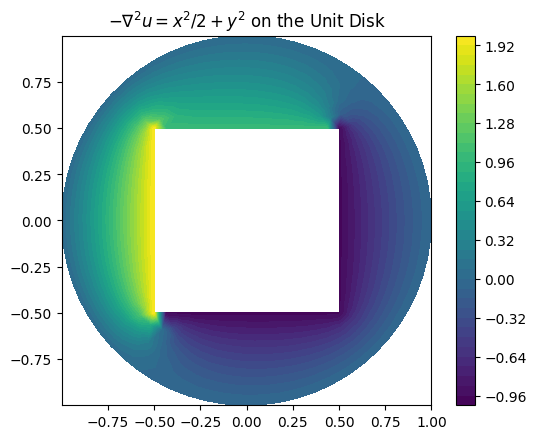

In [ ]:
# Default visualization with the addition of a colorbar
p = plot(solution)
plt.title(r'$-∇ ^2 u = x^2/2+y^2$ on the Unit Disk')
plt.colorbar(p)
plt.show()

To obtain more customizable visualizations, we need to do a bit of work to convert the solution to a format that matplotlib can understand, as illustrated below:

In [ ]:
import matplotlib as mpl# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D
def mesh_triangulation(mesh):
    """
    Convert a FEniCS mesh into a matplotlib Triangulation
    """
    coordinates = mesh.coordinates()
    triangles = mesh.cells()
    return mpl.tri.Triangulation(coordinates[:, 0], coordinates[:, 1], triangles)

triangulation = mesh_triangulation(domain_mesh)
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
c = ax.plot_trisurf(triangulation, np.array(solution.vector()),cmap=mpl.cm.get_cmap("Reds"))
cb = plt.colorbar(c, ax=ax)
cb.set_label(r"$u(x, y)$", fontsize=18)